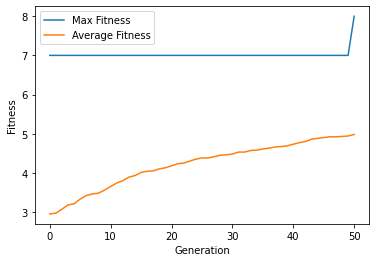

Best state: [1, 5, 0, 6, 3, 7, 2, 4]


In [12]:
import random
import matplotlib.pyplot as plt

# تعیین اندازه صفحه شطرنج
board_size = 8

# تعیین تعداد جمعیت و تعداد ارزیابی‌های تناسب
population_size = 100
max_fitness_evaluations = 10000


# تابع تولید یک حالت تصادفی برای صفحه شطرنج
# این تابع یک حالت تصادفی برای چیدمان شطرنج تولید می‌کند سپس عناصر لیست به صورت تصادفی مخلوط می‌شوند
def generate_random_state():
    state = list(range(board_size))
    random.shuffle(state)
    return state

# تابع محاسبه تناسب یک حالت

#این تابع تعداد تداخل‌های وزیرها را در یک حالت چیدمان شطرنج محاسبه می‌کند.
#مقدار تناسب برابر با اندازه صفحه شطرنج منهای تعداد تداخل‌ها است
#هر زوج وزیر ممکن را در نظر می‌گیرد و اگر وزیرها در یک سطر یا در قطری با یکدیگر تداخل داشته باشند، تعداد تداخل‌ها را به یک واحد افزایش می‌دهد

def calculate_fitness(state):
    conflicts = 0
    for i in range(board_size):
        for j in range(i + 1, board_size):
            if state[i] == state[j] or abs(state[i] - state[j]) == j - i:
                conflicts += 1
                #print(conflicts)
    return board_size - conflicts


# تابع تولید فرزند با استفاده از عملگر ترکیب
#این تابع دو والدین را می‌گیرد و دو فرزند را با استفاده از عملگر ترکیب ایجاد می‌کند.
# یک نقطه تقاطع تصادفی انتخاب می‌شود و عناصر قبل از نقطه تقاطع از والد اول به
# عنوان فرزند اول و عناصر بعد از نقطه تقاطع از والد دوم به عنوان فرزند دوم انتخاب می‌شوند
# بخش اول از یه والد زدیم و بخش دوم رو از یه والد دیگه
def crossover(parent1, parent2):
    
    crossover_point = random.randint(1, board_size - 1)
    
    child1 = parent1[:crossover_point]
    
    for i in parent2:
        if i not in child1:
            child1.append(i)
            
    child2 = parent2[:crossover_point]
    
    for i in parent1:
        if i not in child2:
            child2.append(i)
    return child1, child2


# تابع اعمال جهش بر روی یک فرزند
#این  تابع با احتمال 80 درصد یک جفت عنصر تصادفی را در فرزند جابه‌جا می‌کند
#در این تابع، ابتدا با احتمال 80 درصد چک می‌شود که آیا باید جهش اعمال شود یا خیر
# اگر عدد تصادفی به دست آمده از تابع کمتر از 0.8 باشد، یعنی با احتمال 80 درصد جهش اعمال می‌شود

def mutate(child):
    if random.random() < 0.8:
        #این دو نقطه تصادفی نشان دهنده دو عنصری هستند که در فرزند باید جابه‌جا شوند
        #دو نقطه تصادفی از روی محدوده اندیس‌های آرایه انتخاب می‌شوند
        mutation_points = random.sample(range(board_size), 2)
        #عنصر اول با عنصر دوم جابه‌جا می‌شوند و عنصر دوم با عنصر اول جابه‌جا می‌شوند
        child[mutation_points[0]], child[mutation_points[1]] = child[mutation_points[1]], child[mutation_points[0]]
        #سپس فرزند جدید با جهش برگردانده می‌شود.
    return child


# تابع انتخاب والدین
#این تابع پنج حالت از جمعیت را به صورت تصادفی انتخاب کرده و با توجه به مقادیر تناسب آن‌ها، دو والدین برتر را برمی‌گرداند
#لیست والدین به صورت نزولی مرتب می‌شود
#این عملگر انتخاب والدین بر اساس مقادیر تناسب آن‌ها استفاده می‌شود تا والدین با مقادیر تناسب بیشتر برای تولید فرزندان برگزیده شوند
def select_parents(population):
    parents = random.sample(population, 5)
    parents.sort(reverse=True, key=lambda x: x[1])
    return parents[:2]


# تابع انتخاب بقاء
#این تابع فرزندان را به جمعیت اضافه کرده و 
#  سپس جمعیت را بر اساس مقادیر تناسب مرتب می‌کند و دو حالت با کمترین تناسب را حذف میکند


def select_survivors(population, children):
    #لیست جمعیت بر اساس مقادیر تناسب مرتب می‌شود و لیست فرزندان به لیست جمعیت اضافه می‌شود و 
    #دو حالت با کمترین تناسب را حذف می‌کند.
    population.extend(children)
    population.sort(reverse=True, key=lambda x: x[1])
    return population[:-2]


# تابع رسم نمودار تناسب
#این تابع نموداری از تناسب بالاترین و میانگین تناسب از طول تاریخچه تناسب رسم می‌کند
def plot_fitness(fitness_history):
    generations = range(len(fitness_history))
    max_fitness = [max(fitness) for fitness in fitness_history]
    avg_fitness = [sum(fitness) / len(fitness) for fitness in fitness_history]

    plt.plot(generations, max_fitness, label='Max Fitness')
    plt.plot(generations, avg_fitness, label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()

# پیاده‌سازی الگوریتم ژنتیک

#ابتدا جمعیت اولیه تولید شده و سپس تا زمانی که تعداد ارزیابی تناسب کمتر از حداکثر مقدار مجاز باشد یا به حالت بهینه رسیده شود
#عملیات ترکیب، جهش، انتخاب و بازماندگان را انجام می‌دهد. همچنین نمودار تناسب نیز رسمی‌شود
def genetic_algorithm():
    population = []
    fitness_history = []

    # ایجاد جمعیت اولیه
    #در ابتدا، یک جمعیت اولیه تصادفی ایجاد می‌شود
    #همچنین، تابع تناسب برای هر وضعیت محاسبه می‌شود تا نشان دهد که چقدر وضعیتها بهترین جواب ممکن را دارند
    for _ in range(population_size):
        state = generate_random_state()
        fitness = calculate_fitness(state)
        population.append((state, fitness))

    # انجام تکامل
    #در این مرحله، تکرارهای الگوریتم انجام می‌شوند تا به یک شرط پایانی برسیم
    evaluations = 0
    while evaluations < max_fitness_evaluations:
        children = []
    #دو والدین از جمعیت بر اساس تناسبشان انتخاب می‌شوند. احتمال انتخاب هر والد بر اساس تناسب وی با جمعیت است
    #دو والدین انتخابی برای ترکیب قرار می‌گیرند تا فرزندانی تازه ایجاد کنند.
      # برای افزایش تنوع جمعیت، گاهی اوقات فرزندان ممکن است با اعمال تغییرات تصادفی (جهش) تولید شوند
        #والدین و فرزندان به عنوان جمعیت بعدی انتخاب می‌شوند. برای این کار، از معیارهایی مانند تناسب استفاده می‌شود.
        parent1, parent2 = select_parents(population)
        child1, child2 = crossover(parent1[0], parent2[0])
        child1 = mutate(child1)
        child2 = mutate(child2)
        # تناسب فرزندان با محاسبه تابع تناسب برای آنها محاسبه می‌شود
        fitness1 = calculate_fitness(child1)
        fitness2 = calculate_fitness(child2)
        children.append((child1, fitness1))
        children.append((child2, fitness2))
        evaluations += 2
        population = select_survivors(population, children)
        fitness_history.append([fitness for _, fitness in population])

        # بررسی شرط پایانی
        if population[0][1] == board_size:
            break
    # رسم نمودار تناسب
    plot_fitness(fitness_history)
    # بازگرداندن بهترین حالت
    return population[0][0]

# اجرای الگوریتم
#این دستور الگوریتم ژنتیک را اجرا کرده
best_state = genetic_algorithm()
print("Best state:", best_state)